In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append("../")
from helpers.iaml01cw2_helpers import load_CoVoST2


Xtrn,Ytrn,Xtst,Ytst = load_CoVoST2("C:\\Users\\User\\Documents\\3. Third Year\\IAML\\IAML-CW2\\data")


In [10]:
%%time

from sklearn.cluster import KMeans

kmeans = KMeans(22, random_state = 1)
kmeans.fit(Xtrn)

Wall time: 7.11 s


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=22, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [24]:
np.round(kmeans.inertia_, 4)

38185.817

In [23]:
list(zip(*np.unique(kmeans.labels_, return_counts = True)))

[(0, 1018),
 (1, 1125),
 (2, 1191),
 (3, 890),
 (4, 1162),
 (5, 1332),
 (6, 839),
 (7, 623),
 (8, 1400),
 (9, 838),
 (10, 659),
 (11, 1276),
 (12, 121),
 (13, 152),
 (14, 950),
 (15, 1971),
 (16, 1251),
 (17, 845),
 (18, 896),
 (19, 930),
 (20, 1065),
 (21, 1466)]

In [32]:
Xmeans = []
for c in range(22):
    Xclass = Xtrn[np.where(Ytrn == c)[0]]
    Xmeans.append(Xclass.mean(0))

Xmeans = np.array(Xmeans)
Xmeans.shape

(22, 26)

In [33]:
from sklearn.decomposition import PCA

pca_mean = PCA(2)
Xmean_pca = pca_mean.fit_transform(Xmeans)
cluster_pca = pca_mean.transform(kmeans.cluster_centers_)

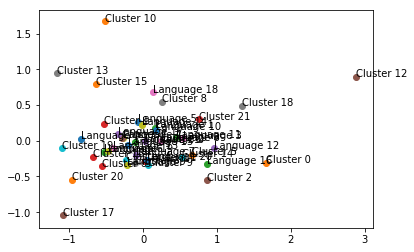

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns



for i in range(22):
    plt.scatter(*Xmean_pca[i])
    plt.annotate(f"Language {i}", Xmean_pca[i])
    
    plt.scatter(*cluster_pca[i])
    plt.annotate(f"Cluster {i}", cluster_pca[i])

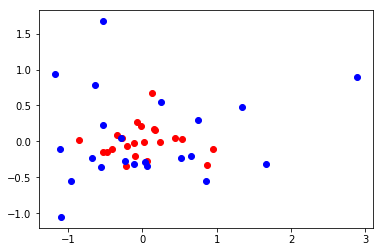

In [71]:
plt.scatter(Xmean_pca.transpose()[0], Xmean_pca.transpose()[1], c = "red")
plt.scatter(cluster_pca.transpose()[0], cluster_pca.transpose()[1], c = "blue")

In [72]:
from sklearn.mixture import GaussianMixture

In [74]:
l0_train = Xtrn[np.where(Ytrn == 0)[0]]
l0_test = Xtst[np.where(Ytst == 0)[0]]

l0_train.shape, l0_test.shape

((1001, 26), (103, 26))

In [90]:
%%time

diag_cov = []
full_cov = []
ks = (1, 3, 5, 10, 15)

for k in ks:
    diag_model = GaussianMixture(k, covariance_type = "diag")
    full_model = GaussianMixture(k, covariance_type = "full")
    
    diag_model.fit(l0_train)
    full_model.fit(l0_train)
    
    diag_cov.append((diag_model.score(l0_train), diag_model.score(l0_test)))
    full_cov.append((full_model.score(l0_train), full_model.score(l0_test)))
    
diag_cov = np.array(diag_cov).transpose()
full_cov = np.array(full_cov).transpose()

Wall time: 566 ms


Text(0,0.5,'Per-sample average log-likelihood')

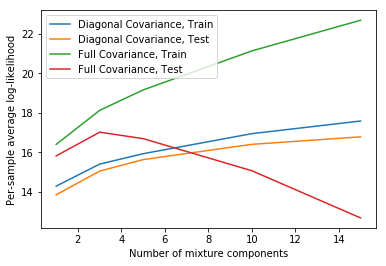

In [91]:
plt.plot(ks, diag_cov[0], label = "Diagonal Covariance, Train")
plt.plot(ks, diag_cov[1], label = "Diagonal Covariance, Test")

plt.plot(ks, full_cov[0], label = "Full Covariance, Train")
plt.plot(ks, full_cov[1], label = "Full Covariance, Test")

plt.legend()
plt.xlabel("Number of mixture components")
plt.ylabel("Per-sample average log-likelihood")

In [98]:
np.round(diag_cov, 4), np.round(full_cov, 4), 

(array([[14.2804, 15.395 , 15.9214, 16.9373, 17.577 ],
        [13.8429, 15.0401, 15.6233, 16.3963, 16.7763]]),
 array([[16.3936, 18.1158, 19.1521, 21.1272, 22.6809],
        [15.8105, 17.0126, 16.685 , 15.0596, 12.6701]]))

In [95]:
full_cov

array([[16.39360044, 18.11578385, 19.15210225, 21.12721939, 22.68094855],
       [15.81051154, 17.0126057 , 16.68495328, 15.05963696, 12.67006168]])